# Linear Regression Analysis and Predictions

This notebook demonstrates linear regression techniques using various datasets, including salary data, housing data, and insurance data. The primary objectives are to explore data relationships, build linear regression models, evaluate model performance, and make predictions.

## Contents

1. **Salary Data Analysis**
   - Load and visualize salary data based on years of experience.
   - Implement a simple linear regression using gradient descent.
   - Calculate Mean Squared Error (MSE) for model evaluation.
   - Compare the custom linear regression model with Scikit-learn's `LinearRegression`.

2. **USA Housing Data Analysis**
   - Load the USA housing dataset and visualize feature relationships using pair plots and correlation heatmaps.
   - Prepare data for model training by dropping unnecessary features.
   - Split data into training and testing sets.
   - Train a linear regression model and evaluate its performance using MSE.
   - Visualize the predictions against the actual values.

3. **Insurance Charges Prediction**
   - Load the insurance dataset and preprocess categorical features.
   - Visualize relationships between features and target charges.
   - Train a linear regression model on the dataset and evaluate using MSE.
   - Make predictions on new input data.
   - Experiment with different train-test splits and evaluate R² scores.

## Dependencies

- `numpy`
- `pandas`
- `seaborn`
- `matplotlib`
- `scikit-learn`

## Usage

- Run each section sequentially to perform linear regression analysis.
- Modify the input data for predictions as needed.

## Notes

- Ensure that the datasets (`salary_data.csv`, `USA_Housing.csv`, `insurance.csv`) are accessible in the Colab environment.
- The notebook includes various plots to visualize relationships and predictions, enhancing understanding of model performance.




<Axes: xlabel='YearsExperience', ylabel='Salary'>

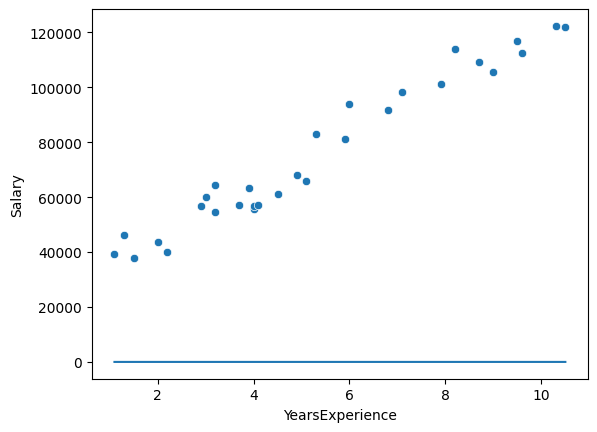

In [ ]:
import seaborn as sns
import numpy as np
import pandas as pd
data = pd.read_csv("/content/salary_data.csv")
x=data["YearsExperience"]
m, c = np.random.rand()*2, np.random.rand()
y=data["Salary"]
ypred=m*x+c
sns.scatterplot(x=x,y=y)
sns.lineplot(x=x,y=ypred)

In [ ]:
#MSE
def bro(y,ypred):
    n=len(y)
    err=((ypred-y)**2)
    errr=1/n*err.sum()
    return(errr)
bro(y,ypred)

6502833514.615797

In [ ]:
# Gradient Calculation
error=ypred - y
lr=.0001
#m is the # of points
mgrad=(error*x).mean()
cgrad=error.mean()
print(mgrad,cgrad)

-477394.17397775163 -76002.29794255522


In [ ]:
print(m)
m=m-(lr*mgrad)
print(m)
print(c)
c=c-(lr*cgrad)
print(c)

0.10221465960299914
47.84163205737816
0.15895688675714292
7.7591866810126655


In [ ]:
newypred=m*x+c

6000790214.415393
5578298209.882168
5186329908.030309
4822679799.926037
4485301737.155345
4172297417.123269
3881905700.355515
3612492699.6856055
3362542585.554428
3130649055.678989


<Axes: xlabel='YearsExperience', ylabel='Salary'>

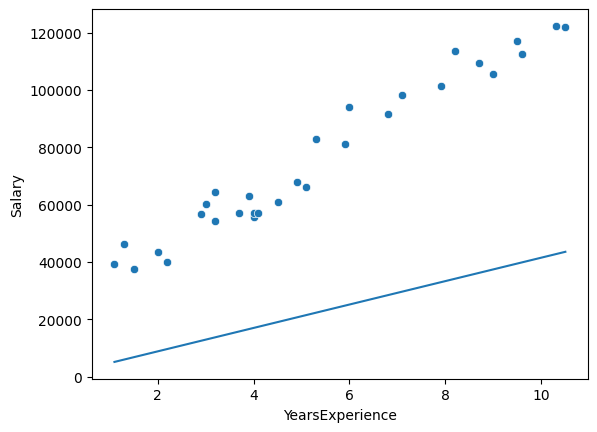

In [ ]:
x=data["YearsExperience"]
y=data["Salary"]
for i in range(10):
  ypred=m*x+c
  error=ypred - y
  lr=.001
  #m is the # of points
  mgrad=(error*x).mean()
  cgrad=error.mean()
  m=m-(lr*mgrad)
  c=c-(lr*cgrad)
  ypred=m*x+c
  print(bro(y,ypred))
sns.scatterplot(x=x,y=y)
sns.lineplot(x=x,y=ypred)

In [ ]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x.values.reshape(30,1),y)
ypred=lr.predict(x.values.reshape(30,1))
model_mse=bro(y,ypred)
print(model_mse)

31270951.722280964


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
data=pd.read_csv("/content/USA_Housing.csv")

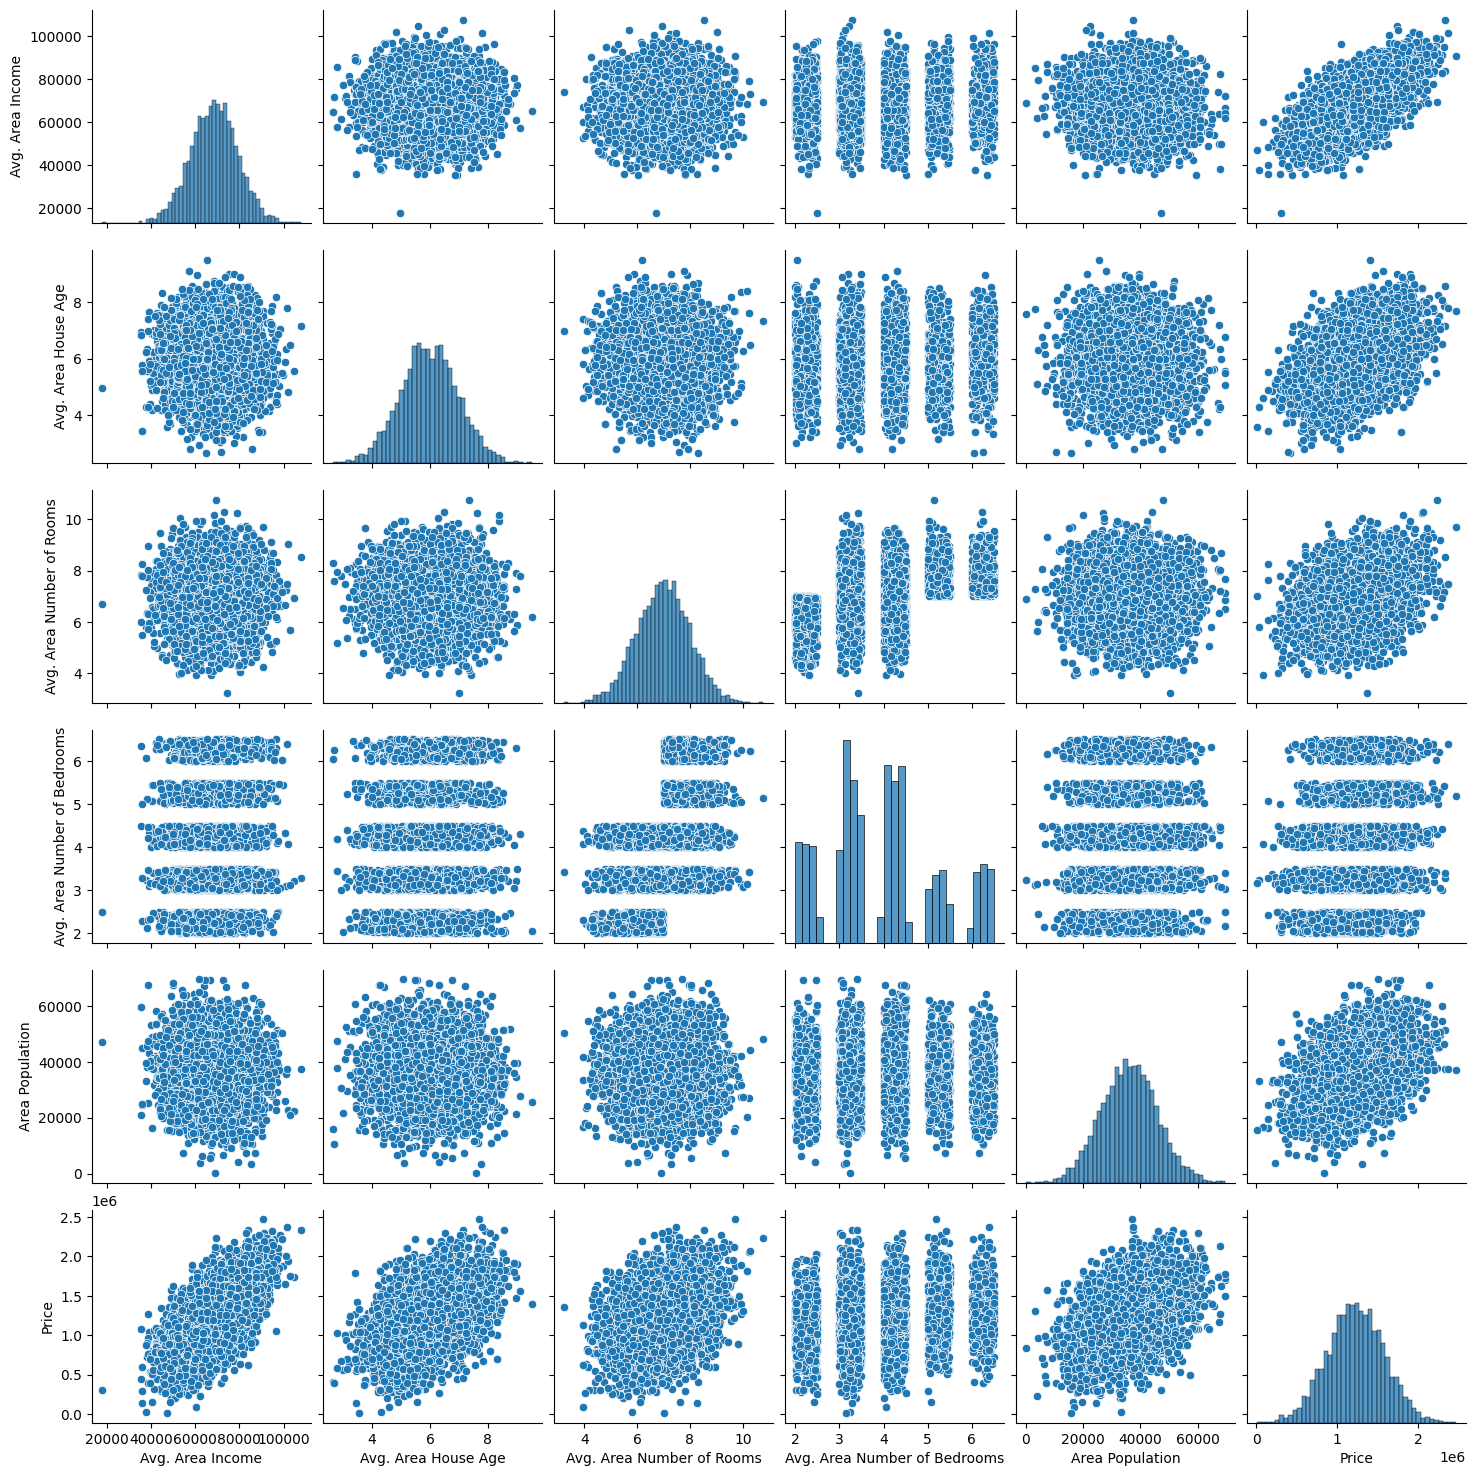

In [ ]:
sns.pairplot(data)

<Axes: >

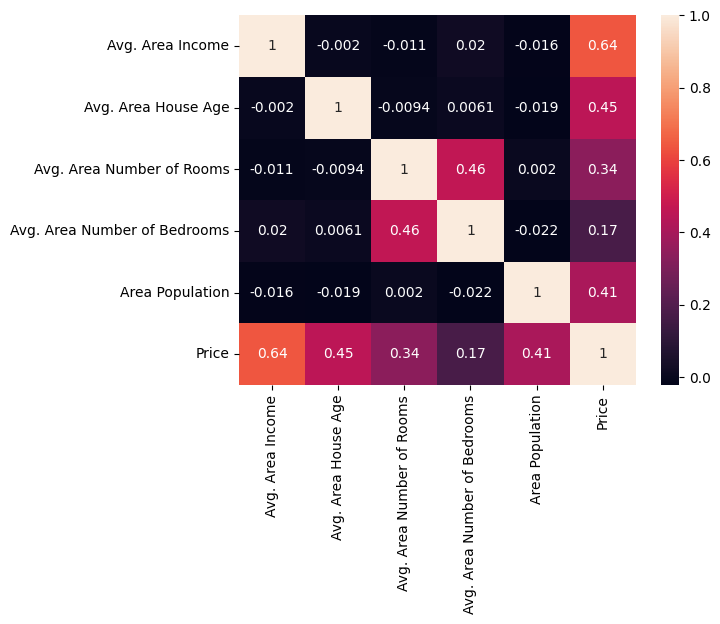

In [ ]:
sns.heatmap(data.corr(numeric_only=True),annot=True)

In [ ]:
data.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [ ]:
newdata=data.drop(["Price","Address"],axis=1)

In [ ]:
data.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [ ]:
# Split data into testing and training data
# x = features
# y = the prediction target

x=data[["Avg. Area Income","Avg. Area House Age","Avg. Area Number of Rooms","Avg. Area Number of Bedrooms","Area Population"]]
y=data["Price"]
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2,random_state=2)

In [ ]:
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(4000, 5)
(1000, 5)
(4000,)
(1000,)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
lr = LinearRegression()
lr.fit(xtrain,ytrain)

LinearRegression()

In [ ]:
print(lr.coef_)

[2.15423467e+01 1.64823861e+05 1.19807562e+05 2.31574320e+03
 1.52295835e+01]


In [ ]:
print(lr.intercept_)

-2628436.3012565337


In [ ]:
cdf = pd.DataFrame(data = lr.coef_, index = xtrain.columns, columns = ["Coef"])
cdf

,Coef
Avg. Area Income,21.542347
Avg. Area House Age,164823.861352
Avg. Area Number of Rooms,119807.562052
Avg. Area Number of Bedrooms,2315.743199
Area Population,15.229584


In [ ]:
predictions=lr.predict(xtest)
print(type(predictions))

<class 'numpy.ndarray'>


In [ ]:
from sklearn.metrics import mean_squared_error
msc=mean_squared_error(predictions,ytest)
msc

9776004984.078733

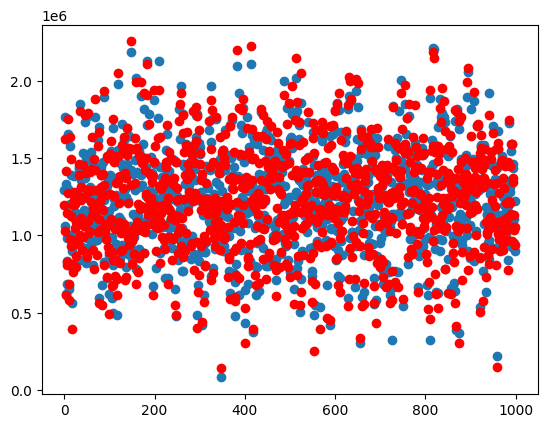

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(range(0,1000),predictions)
plt.scatter(range(0,1000),ytest,color="red")


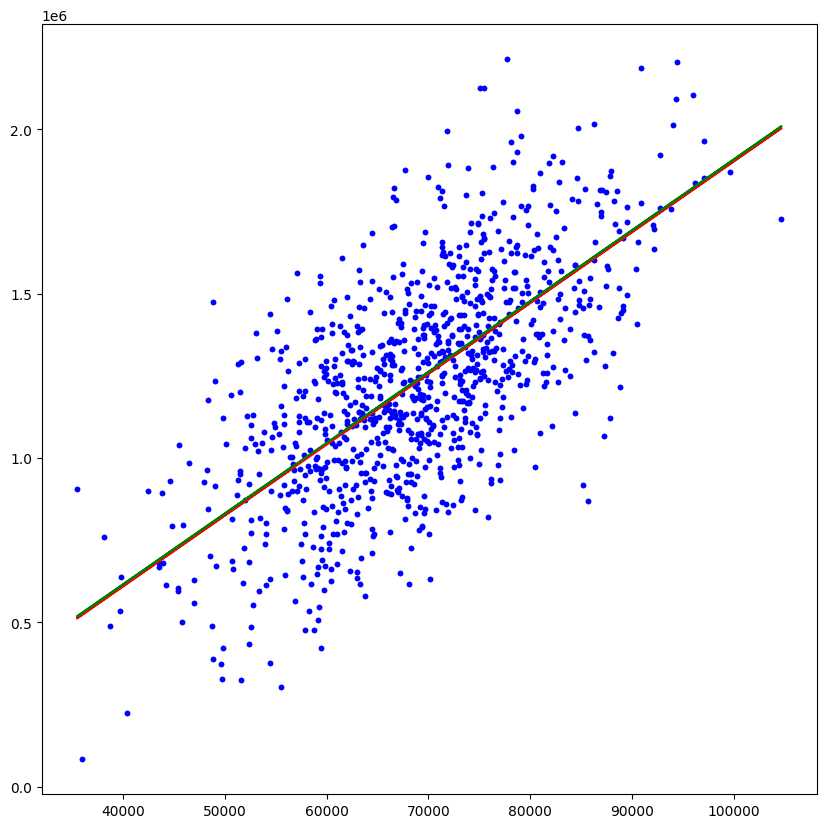

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(xtest["Avg. Area Income"],predictions,".",color="b")
x1=xtest["Avg. Area Income"]
x2=xtest["Avg. Area House Age"].mean()
x3=xtest["Avg. Area Number of Rooms"].mean()
x4=xtest["Avg. Area Number of Bedrooms"].mean()
x5=xtest["Area Population"].mean()
xa=xtest["Avg. Area Income"]
xb=xtest["Avg. Area House Age"].median()
xc=xtest["Avg. Area Number of Rooms"].median()
xd=xtest["Avg. Area Number of Bedrooms"].median()
xe=xtest["Area Population"].median()
m1=lr.coef_[0]
m2=lr.coef_[1]
m3=lr.coef_[2]
m4=lr.coef_[3]
m5=lr.coef_[4]
c=lr.intercept_
y=(m1*x1 + m2*x2 + m3*x3 + m4*x4 + m5*x5)+c
ya=(m1*xa + m2*xb + m3*xc + m4*xd + m5*xe)+c

plt.plot(xtest["Avg. Area Income"],predictions,".",color="b")
plt.plot(x,y,color="r")
plt.plot(x,ya,color="g")

In [ ]:
lr.intercept_

-2628436.3012565337

In [ ]:
x3=data["Avg. Area Income"].values.reshape(-1,1)
y3=data["Price"]
x3train, x3test, y3train, y3test = train_test_split(x3,y3,test_size=0.2,random_state=2)

In [ ]:
lr3 = LinearRegression()
lr3.fit(x3train, y3train)

LinearRegression()

In [ ]:
print(lr3.intercept_)
print(lr3.coef_)
print(lr.intercept_)
print(lr.intercept_)

-223103.83438920276
[21.22931612]
-2628436.3012565337
-2628436.3012565337


In [ ]:
mse=mean_squared_error(predictions,ytest)
predictions3=lr3.predict(x3test)
mse3=mean_squared_error(predictions3,y3test)
print(f"LR 1: {mse}")
print(f"LR 3: {mse3}")

LR 1: 9776004984.078733
LR 3: 72284115180.04688


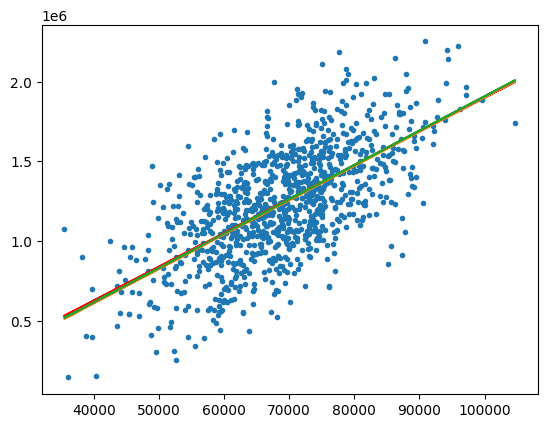

In [ ]:
plt.plot(x3test,y3test,".")
plt.plot(x3test,predictions3,color="r")
plt.plot(x1,y)
plt.plot(x1,ya)

In [ ]:
data=pd.read_csv("/content/insurance.csv")
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
data=pd.read_csv("/content/insurance.csv")
print(data["region"].unique())
print(data["smoker"].unique())
print(data["sex"].unique())
data.head()
def bro(i):
  if i=="yes":
    return 1
  else:
    return 0
def sigma(i):
  if i=="male":
    return 1
  else:
    return 0
def skibidi(i):
  if i=="southwest":
    return 0
  elif i=='southeast':
    return 1
  elif i=='northwest':
    return 2
  elif i=='northeast':
    return 3
data["smoker"]=data["smoker"].apply(bro)
data["sex"]=data["sex"].apply(sigma)
data["region"]=data["region"].apply(skibidi)


data.head()
#data.info()

['southwest' 'southeast' 'northwest' 'northeast']
['yes' 'no']
['female' 'male']


sex
1    676
0    662
Name: count, dtype: int64

<Axes: >

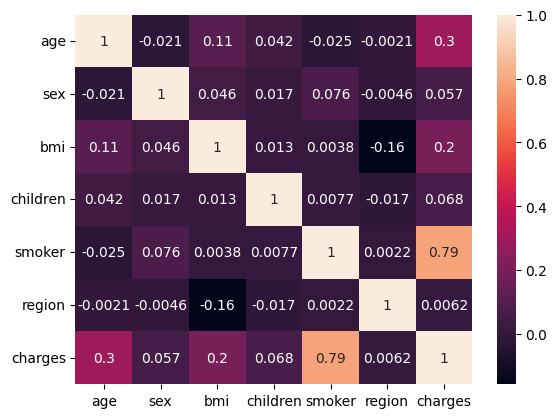

In [ ]:
data.corr(numeric_only=True)
sns.heatmap(data.corr(numeric_only=True),annot=True)

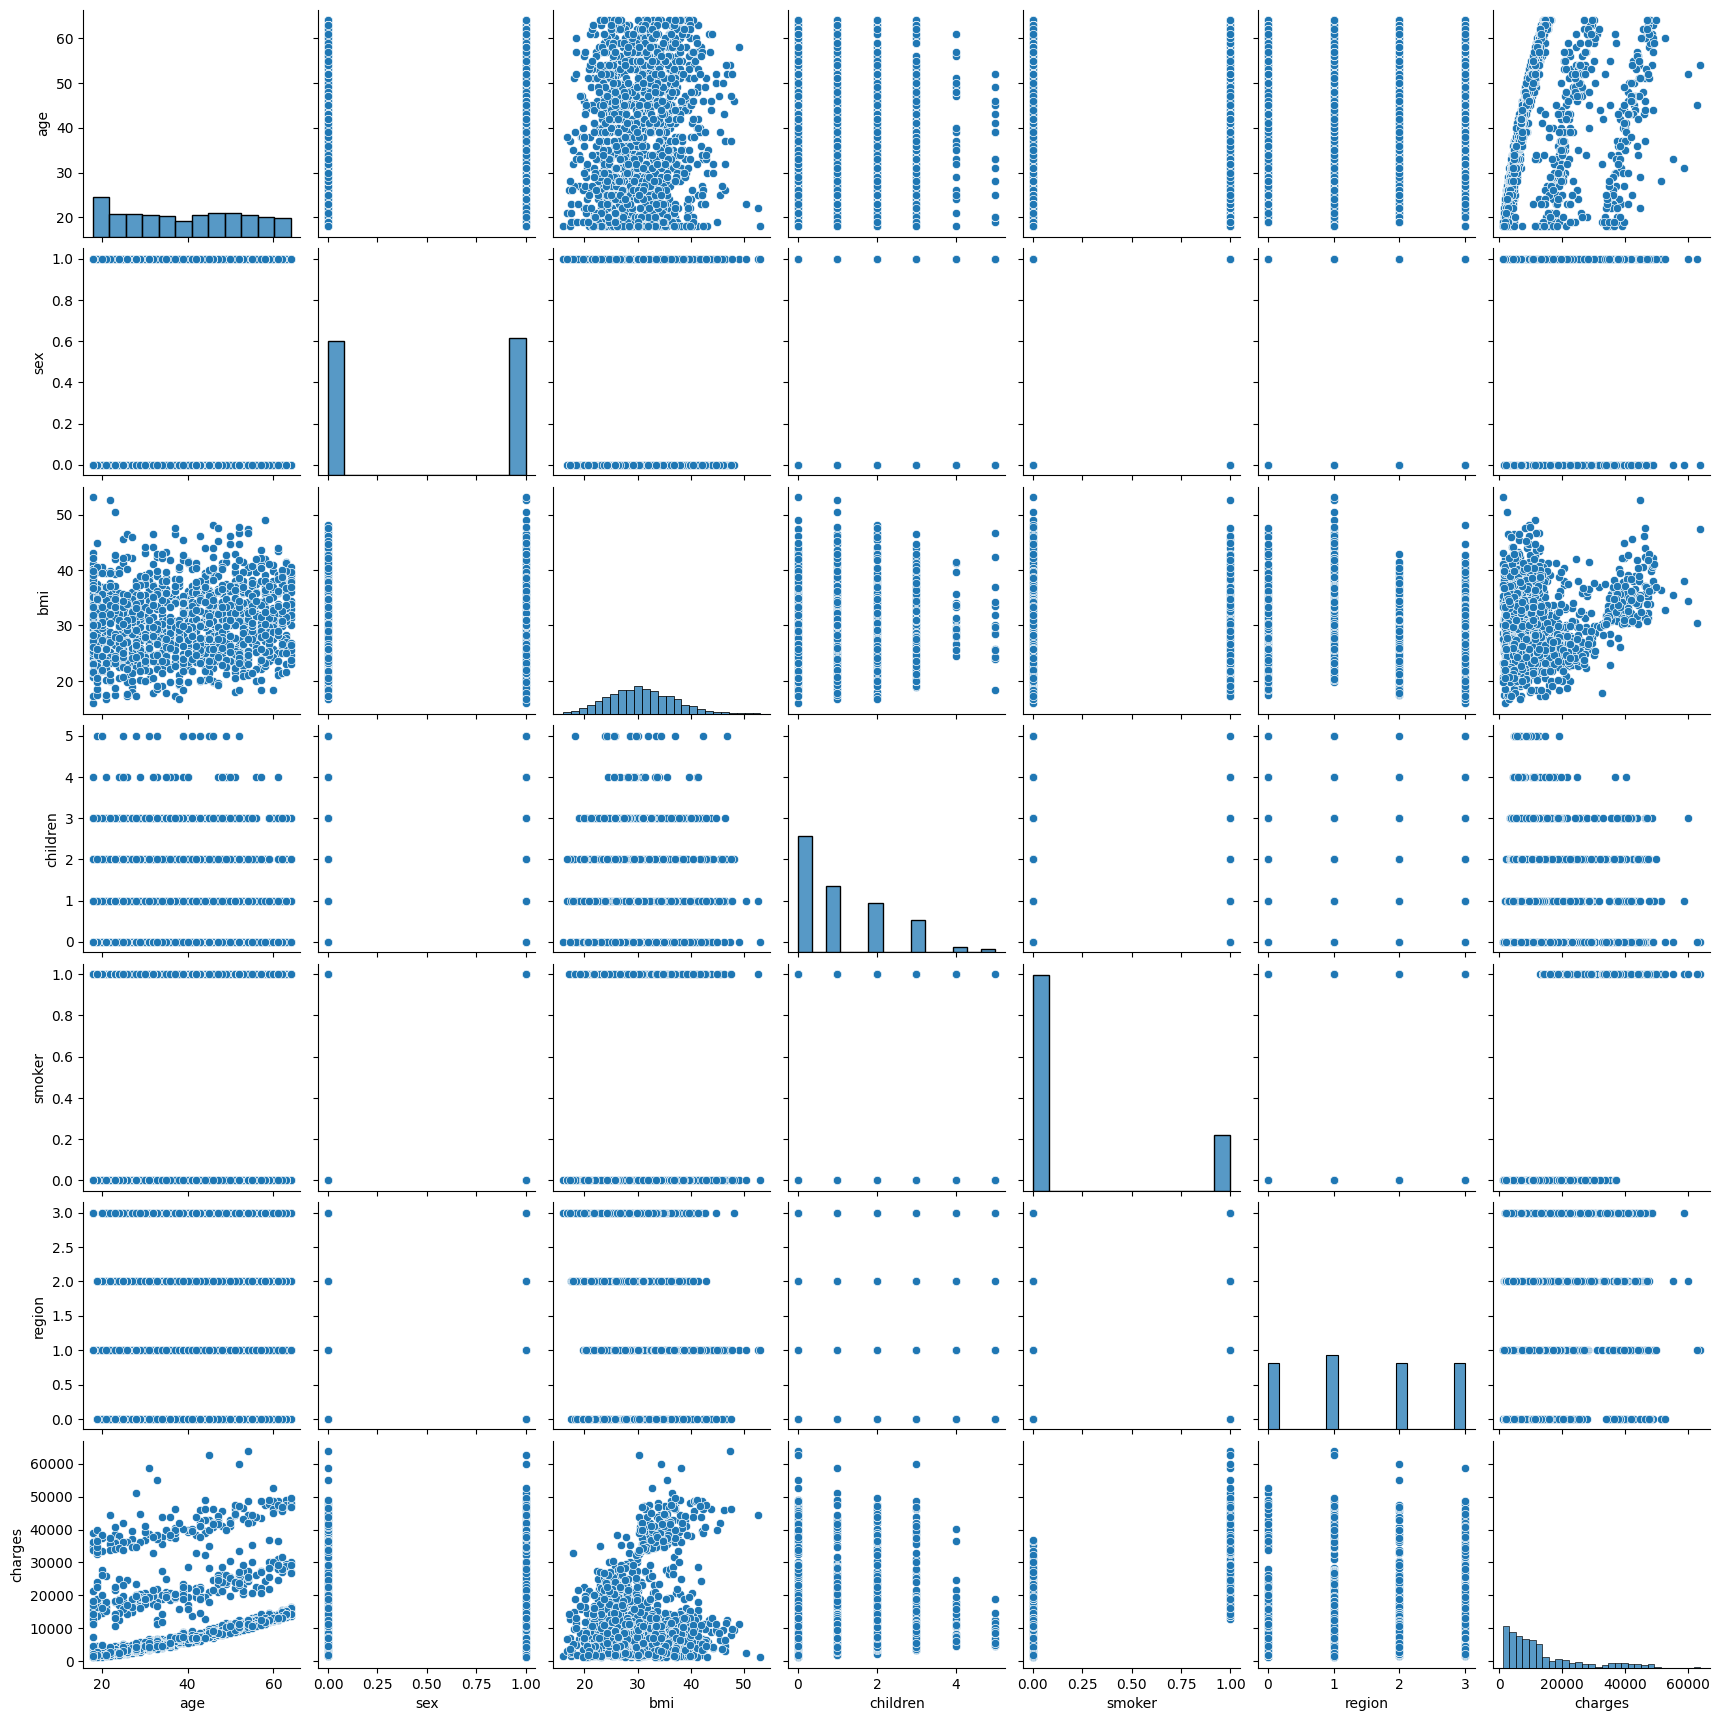

In [ ]:
sns.pairplot(data)

In [ ]:
#Use all features
y=data["charges"]
x=data.drop(columns=["charges","region"],axis=1)
xtrain, xtest, ytrain, ytest= train_test_split(x,y,test_size=0.2,random_state=2)


In [ ]:
lr=LinearRegression()
lr.fit(xtrain,ytrain)
predictions=lr.predict(xtest)
mse=mean_squared_error(predictions,ytest)
mse

61966454.88120811

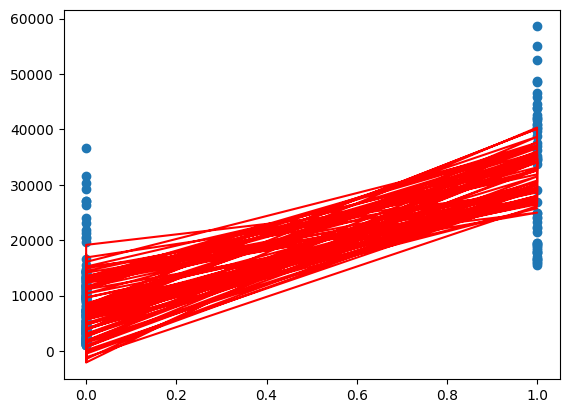

In [ ]:
plt.scatter(xtest["smoker"],ytest)
plt.plot(xtest["smoker"],predictions, color="red")

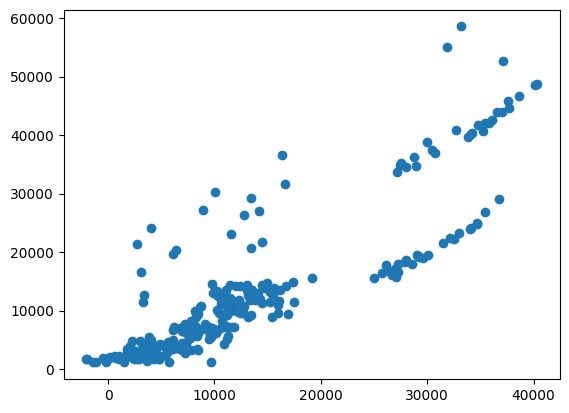

In [ ]:
plt.scatter(predictions,ytest)

In [ ]:
r2 = metrics.r2_score(ytest,predictions)
r2

0.7445422986536503

In [ ]:
input_data = (31,1,25.74,0,1,0)
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)
print(input_data_reshaped)
prediction = lr.predict(input_data_reshaped)
print(prediction)

[[31.    1.   25.74  0.    1.    0.  ]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


ValueError: X has 6 features, but LinearRegression is expecting 1 features as input.

In [ ]:
x2train,x2test,y2train,y2test = train_test_split(x,y, test_size = 0.4, random_state = 50)
x3train,x3test,y3train,y3test = train_test_split(x,y, test_size = 0.3, random_state = 50)

In [ ]:
lr2=LinearRegression()
lr3=LinearRegression()
lr2.fit(x2train,y2train)
lr3.fit(x3train, y3train)

LinearRegression()

In [ ]:
predictions2=lr2.predict(x2test)
predictions3=lr3.predict(x3test)

In [ ]:
r22 = metrics.r2_score(y2test,predictions2)
r23 = metrics.r2_score(y3test,predictions3)
r2 = metrics.r2_score(ytest,predictions)
print(r2)
print(r22)
print(r23)

0.5873875312183237
0.7752929892343717
0.7836766591357425
